In [2]:
!pip install gensim
!pip install seaborn

In [1]:
import pandas as pd
from gensim.models import Word2Vec
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 学習済みモデルのロード
model_file_path = '../../KITERETU/gw2v160.model'
model = Word2Vec.load(model_file_path)

In [8]:
input_str=input("意味類似度ネットワークを作りたい単語を入力してください===>")

# 似ている単語TOP7を書き出す
out = model.wv.most_similar(positive=[input_str], topn=10)

print("{}に類似する文字列とその類似度は以下の通り".format(input_str))

#AtCoderでよく使う辞書処理を使って県と数値を取り出す
pre=[]
pre.append(input_str)
for prefecture, value in out:
    print(prefecture,"\t",value)
    pre.append(prefecture)

df = pd.crosstab(pre, pre, rownames=['X'], colnames=['Y'])

for i in pre:
    for j in pre:
        #0を除外する処理を入れていないので計算数がその分多い
        if model.wv.similarity(i,j) >= 1.0:
            df.loc[i,j]=0.0
        elif model.wv.similarity(i,j) >= 0.6:
            df.loc[i,j]=model.wv.similarity(i,j)
        else:
            df.loc[i,j]=0
        #print(df.loc['Bob', 'age'])
        #df.iloc[1,0]

print("\nそれぞれの類似度を計算した二次元配列は以下の通り\n",df)


バナナに類似する文字列とその類似度は以下の通り
マンゴー 	 0.7066854238510132
ココナッツ 	 0.6962549686431885
フルーツ 	 0.6862537860870361
ココ椰子 	 0.6659659743309021
アボカド 	 0.6641873121261597
ナッツ 	 0.6584610342979431
パイナップル 	 0.6551308035850525
レタス 	 0.6533551216125488
グアバ 	 0.6487136483192444
タロイモ 	 0.6474094986915588

それぞれの類似度を計算した二次元配列は以下の通り
 Y           アボカド       グアバ     ココナッツ      ココ椰子      タロイモ       ナッツ       バナナ   
X                                                                              
アボカド    1.000000  0.733056  0.601158  0.000000  0.000000  0.667777  0.664187  \
グアバ     0.733056  0.000000  0.697883  0.702128  0.622717  0.000000  0.648714   
ココナッツ   0.601158  0.697883  0.000000  0.736337  0.676967  0.661892  0.696255   
ココ椰子    0.000000  0.702128  0.736337  0.000000  0.758893  0.000000  0.665966   
タロイモ    0.000000  0.622717  0.676967  0.758893  0.000000  0.000000  0.647409   
ナッツ     0.667777  0.000000  0.661892  0.000000  0.000000  0.000000  0.658461   
バナナ     0.664187  0.648714  0.696255  0.665966  0

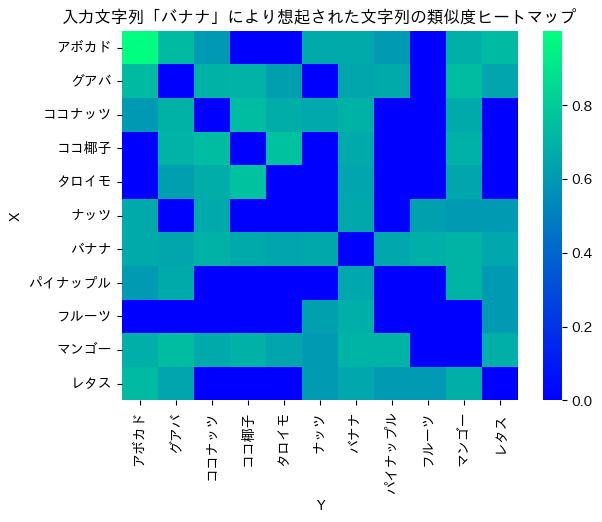

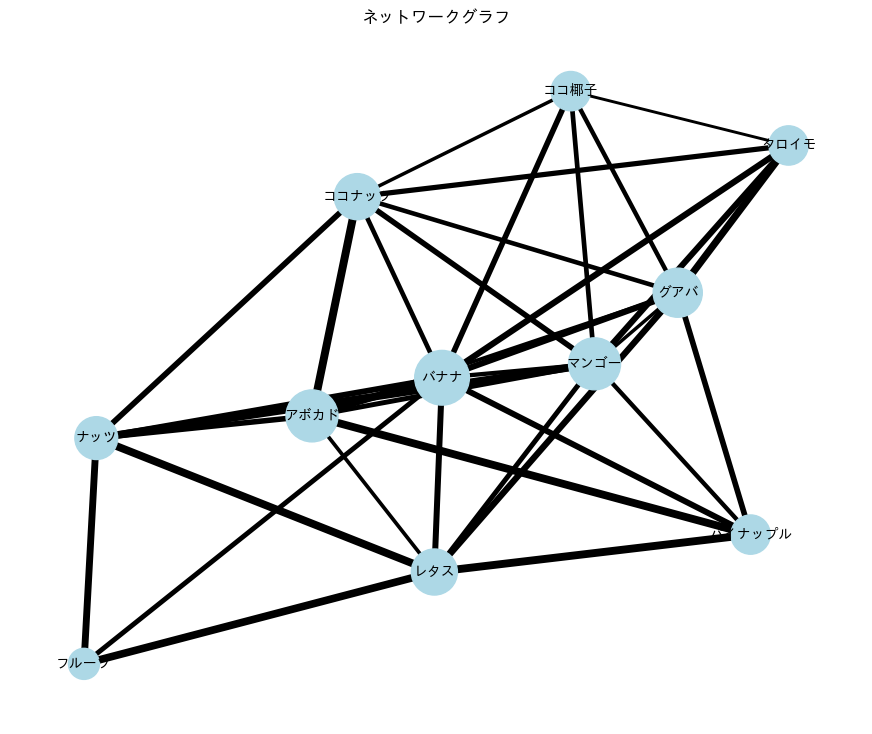

In [9]:
plt.figure()
plt.title("入力文字列「{}」により想起された文字列の類似度ヒートマップ".format(input_str))
sns.heatmap(df,cmap="winter")
plt.savefig('eaborn_heatmap_dataframe.png')

# ネットワークグラフの作成
G = nx.from_pandas_adjacency(df, create_using=nx.Graph)

# グラフの描画
plt.figure(figsize=(len(input_str)+8, len(input_str)+6))
pos = nx.spring_layout(G)  # ノードの位置を設定
weights = nx.get_edge_attributes(G, 'weight')

# 辺の太さを重みに応じて調整
max_weight = max(weights.values())
edge_widths = [(6 * (1 - weights[edge])) ** 2 for edge in G.edges()]

# ノードの太さを重みに応じて調整
node_sizes = [50 + 150 * G.degree(node) for node in G.nodes()]

# グラフを描画
japanize_matplotlib.japanize()
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='black')
nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', font_color='black', font_size=10)
plt.title('ネットワークグラフ')
plt.axis('off')
plt.show()

赤に類似する文字列とその類似度は以下の通り
青 	 0.8831947445869446
黄色 	 0.7592792510986328
白 	 0.7574406862258911
青色 	 0.7550033926963806
黒 	 0.7461652159690857
ずきん 	 0.7437013983726501
赤青 	 0.7349072694778442
赤色 	 0.7316375970840454
水色 	 0.7268540859222412
赤白 	 0.7261124849319458

それぞれの類似度を計算した二次元配列は以下の通り
 Y         ずきん        水色         白         赤        赤白        赤色        赤青   
X                                                                           
ずきん  0.000000  0.000000  0.634270  0.743701  0.000000  0.000000  0.640317  \
水色   0.000000  0.000000  0.000000  0.726854  0.679314  0.644407  0.701679   
白    0.634270  0.000000  0.000000  0.757441  0.641007  0.000000  0.635183   
赤    0.743701  0.726854  0.757441  0.000000  0.726112  0.731638  0.734907   
赤白   0.000000  0.679314  0.641007  0.726112  0.000000  0.642518  0.664468   
赤色   0.000000  0.644407  0.000000  0.731638  0.642518  0.000000  0.000000   
赤青   0.640317  0.701679  0.635183  0.734907  0.664468  0.000000  0.000000   
青    0.699213  0.748

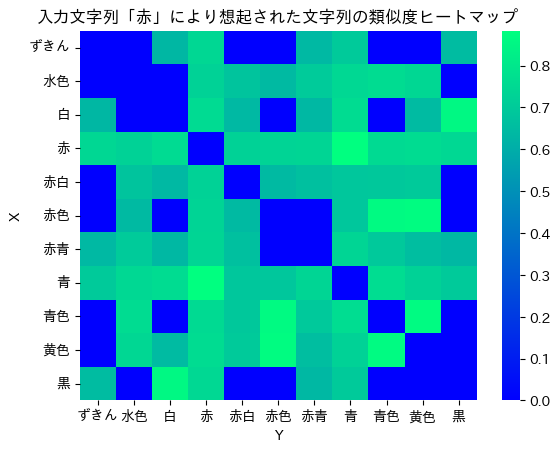

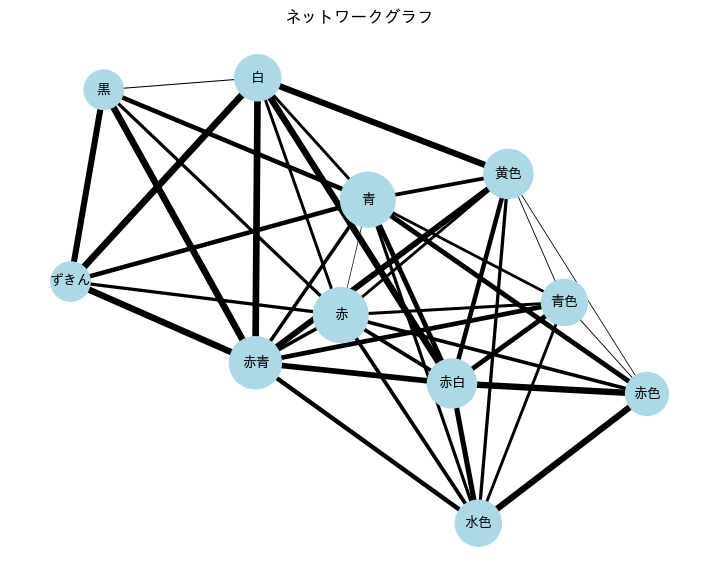

In [9]:
input_str=input("意味類似度ネットワークを作りたい単語を入力してください===>")

# 似ている単語TOP7を書き出す
out = model.wv.most_similar(positive=[input_str], topn=10)

print("{}に類似する文字列とその類似度は以下の通り".format(input_str))

#AtCoderでよく使う辞書処理を使って県と数値を取り出す
pre=[]
pre.append(input_str)
for prefecture, value in out:
    print(prefecture,"\t",value)
    pre.append(prefecture)

df = pd.crosstab(pre, pre, rownames=['X'], colnames=['Y'])

for i in pre:
    for j in pre:
        #0を除外する処理を入れていないので計算数がその分多い
        if model.wv.similarity(i,j) >= 1.0:
            df.loc[i,j]=0.0
        elif model.wv.similarity(i,j) >= 0.6:
            df.loc[i,j]=model.wv.similarity(i,j)
        else:
            df.loc[i,j]=0
        #print(df.loc['Bob', 'age'])
        #df.iloc[1,0]

print("\nそれぞれの類似度を計算した二次元配列は以下の通り\n",df)

plt.figure()
plt.title("入力文字列「{}」により想起された文字列の類似度ヒートマップ".format(input_str))
sns.heatmap(df,cmap="winter")
plt.savefig('eaborn_heatmap_dataframe.png')

# ネットワークグラフの作成
G = nx.from_pandas_adjacency(df, create_using=nx.Graph)

# グラフの描画
plt.figure(figsize=(len(input_str)+8, len(input_str)+6))
pos = nx.spring_layout(G)  # ノードの位置を設定
weights = nx.get_edge_attributes(G, 'weight')

# 辺の太さを重みに応じて調整
max_weight = max(weights.values())
edge_widths = [(6 * (1 - weights[edge])) ** 2 for edge in G.edges()]

# ノードの太さを重みに応じて調整
node_sizes = [50 + 150 * G.degree(node) for node in G.nodes()]

# グラフを描画
japanize_matplotlib.japanize()
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=node_sizes)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='black')
nx.draw_networkx_labels(G, pos, font_family='IPAexGothic', font_color='black', font_size=10)
plt.title('ネットワークグラフ')
plt.axis('off')
plt.savefig('eaborn_networkgraph_dataframe.png')
plt.show()

